In [69]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [19]:
#uploading the dataset
df=pd.read_csv('../input/hepatitis-data/hepatitis_csv.csv')

#showing the dataset
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [20]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [57]:
#preprocessing
def preprocess_inputs(df):
    df=df.copy()
    #droppig protime

    # continous_features
    continous_features=['age','bilirubin','alk_phosphate','sgot','albumin','protime']
    for column in continous_features:
        df[column]=df[column].fillna(df[column].mean())
    #all other column 
    for column in df.columns.drop(continous_features):
        df[column]=df[column].fillna(df[column].mode().sample(1,random_state=1).values[0])
    #converting boolean to integer
    for column in df.select_dtypes('bool'):
        df[column]=df[column].astype(np.int)
    #replace sex with numbers
    
    df['sex']=df['sex'].replace({
        'female':0,
        'male':1
    })
    
    #Shuffling th dataset
    df=df.sample(frac=1.0,random_state=1).reset_index(drop=True)
    #Change the label name
    df=df.rename(columns={'class':'label'})
    #Splitting the data
    y=df['label']
    x=df.drop('label',axis=1)
    return x,y

    

In [45]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
df['liver_big'].mode()

0    True
dtype: object

In [43]:
continous_features=['age','bilirubin','alk_phosphate','sgot','protime']
 
df.columns.drop(continous_features)
  

Index(['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'albumin', 'histology', 'class'],
      dtype='object')

In [59]:
x,y=preprocess_inputs(df)
y


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


0      live
1      live
2      live
3       die
4       die
       ... 
150    live
151    live
152    live
153    live
154    live
Name: label, Length: 155, dtype: object

In [38]:
#checking na
x.isna().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [8]:
#getting mean of the missing vluae
df.isna().mean()

age                0.000000
sex                0.000000
steroid            0.006452
antivirals         0.000000
fatigue            0.006452
malaise            0.006452
anorexia           0.006452
liver_big          0.064516
liver_firm         0.070968
spleen_palpable    0.032258
spiders            0.032258
ascites            0.032258
varices            0.032258
bilirubin          0.038710
alk_phosphate      0.187097
sgot               0.025806
albumin            0.103226
protime            0.432258
histology          0.000000
class              0.000000
dtype: float64

In [70]:
Kmeans=KMeans(n_clusters=2)
Kmeans.fit(x)
cluster_labels=Kmeans.labels_
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0], dtype=int32)

In [85]:
#Reducing the dataset into two column dataset with pca
pca=PCA(n_components=2)
x_reduced=pd.DataFrame(pca.fit_transform(x),index=x.index,columns=['PC1','PC2'])
centroids=pca.transform(Kmeans.cluster_centers_)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [77]:
x_reduced

,PC1,PC2
0,-0.139273,33.906289
1,-47.312210,-43.626372
2,-68.051090,-10.943418
3,-25.394887,3.526035
4,-62.618380,-29.828045
...,...,...
150,-31.520122,14.978848
151,57.084448,17.289667
152,179.363050,-54.676630
153,0.278226,191.007394


In [94]:
#concating label and clusters

x_reduced=pd.concat([x_reduced,y,pd.Series(cluster_labels,name='clusters')],axis=1)

In [83]:
Kmeans.cluster_centers_

array([[4.10791367e+01, 1.07913669e-01, 5.03597122e-01, 1.58273381e-01,
        6.33093525e-01, 3.81294964e-01, 1.87050360e-01, 8.48920863e-01,
        3.66906475e-01, 1.94244604e-01, 3.09352518e-01, 1.29496403e-01,
        1.07913669e-01, 1.34723094e+00, 1.02418237e+02, 6.25652961e+01,
        3.82691890e+00, 6.20729235e+01, 4.38848921e-01],
       [4.22500000e+01, 6.25000000e-02, 5.62500000e-01, 1.25000000e-01,
        8.12500000e-01, 5.00000000e-01, 3.75000000e-01, 7.50000000e-01,
        5.62500000e-01, 1.87500000e-01, 5.00000000e-01, 1.25000000e-01,
        1.87500000e-01, 2.12500000e+00, 1.30581349e+02, 2.88562500e+02,
        3.73340827e+00, 5.99353693e+01, 5.62500000e-01]])

In [87]:
centroids

array([[-23.50313433,   0.34787013],
       [204.18347953,  -3.02212175]])

In [97]:
cluster_0_examples

,PC1,PC2,label,clusters
0,-0.139273,33.906289,live,0
1,-47.312210,-43.626372,live,0
2,-68.051090,-10.943418,live,0
3,-25.394887,3.526035,die,0
4,-62.618380,-29.828045,die,0
...,...,...,...,...
149,-57.290660,-12.441333,live,0
150,-31.520122,14.978848,live,0
151,57.084448,17.289667,live,0
153,0.278226,191.007394,live,0


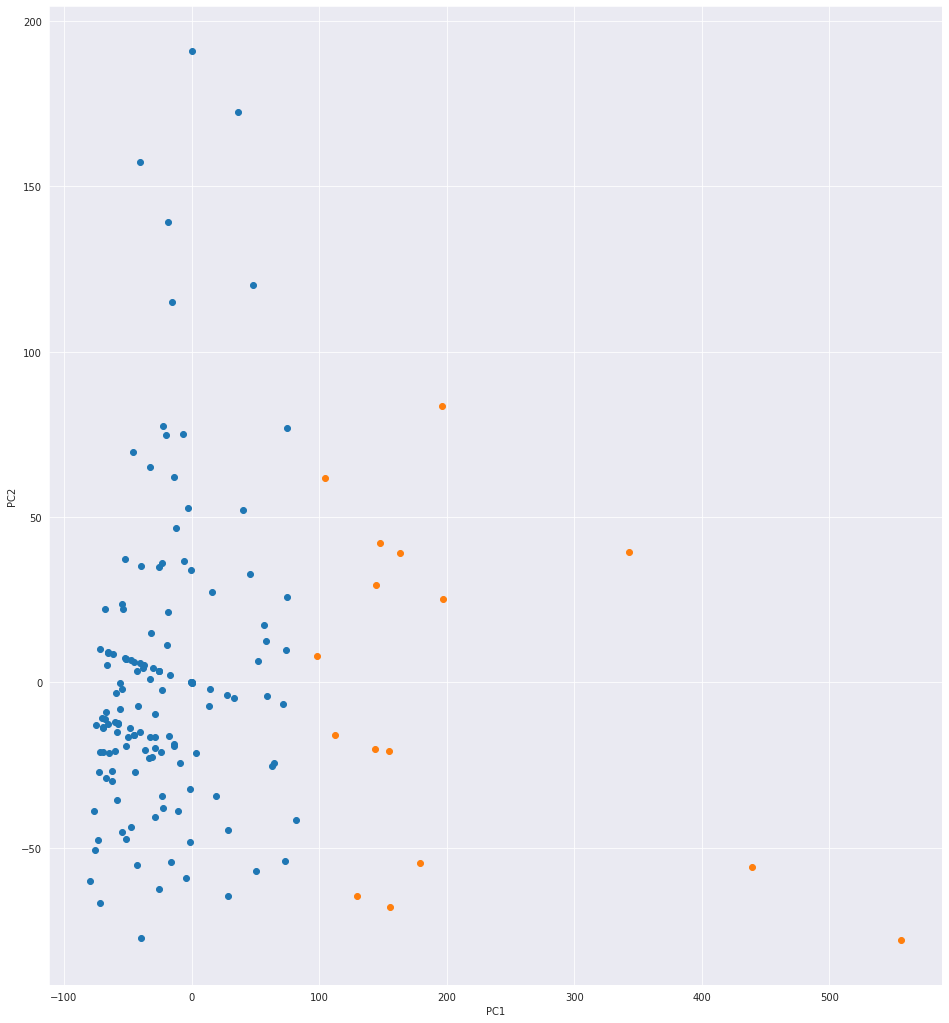

In [101]:
#ploting kmeans cluster
cluster_0_examples=x_reduced.query('clusters==0')
cluster_1_examples=x_reduced.query('clusters==1')
plt.figure(figsize=(16,18))
plt.scatter(cluster_0_examples['PC1'],cluster_0_examples['PC2'],label='Cluster_A')
plt.scatter(cluster_1_examples['PC1'],cluster_1_examples['PC2'],label='Cluster_B')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [102]:
#Training the model
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=1)

In [104]:
#scaling
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),index=x_train.index,columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),index=x_test.index,columns=x_test.columns)

In [108]:
#training the model
model=RandomForestClassifier()
model.fit(x_train,y_train)
score=model.score(x_test,y_test)

In [109]:
#Result
print('Model Accuracy',score)

Model Accuracy 0.851063829787234
